In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [4]:
df = pd.read_csv('titanic.csv')
print(df.iloc[0,:].to_string())

survived                 0
pclass                   3
sex                   male
age                   22.0
sibsp                    1
parch                    0
fare                  7.25
embarked                 S
class                Third
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                False


### split

In [11]:
def entropy(y):
    """Calculate entropy of a binary target array."""
    p1 = np.mean(y)
    p0 = 1 - p1
    if p1 == 0 or p1 == 1:
        return 0
    return -p0 * np.log2(p0) - p1 * np.log2(p1)

def gini(y):
    """Calculate Gini impurity of a binary target array."""
    p1 = np.mean(y)
    p0 = 1 - p1
    return 1 - p0**2 - p1**2

def best_split(df, feature_col, target_col):
    """Find the split point that maximizes information gain."""
    values = np.sort(df[feature_col].unique())
    split_points = (values[:-1] + values[1:]) / 2
    best_gain = -1
    best_split = None
    base_entropy = entropy(df[target_col])
    base_gini = gini(df[target_col])
    for split in split_points:
        left = df[df[feature_col] <= split][target_col]
        right = df[df[feature_col] > split][target_col]
        weighted_entropy = (len(left) * entropy(left) + len(right) * entropy(right)) / len(df)
        weighted_gini = (len(left) * gini(left) + len(right) * gini(right)) / len(df)
        info_gain = base_entropy - weighted_entropy
        gini_gain = base_gini - weighted_gini
        if info_gain > best_gain:
            best_gain = info_gain
            best_split = split
            best_gini_gain = gini_gain
    return best_split, best_gain, best_gini_gain, weighted_gini

In [12]:
split, gain, gini_gain, weighted_gini = best_split(df, 'pclass', 'survived')
print(f"Best split: {split}, Information gain: {gain:.4f}, Gini gain: {gini_gain:.4f}, Weighted Gini: {weighted_gini:.4f}")

Best split: 2.5, Information gain: 0.0758, Gini gain: 0.0491, Weighted Gini: 0.4239


### decision tree

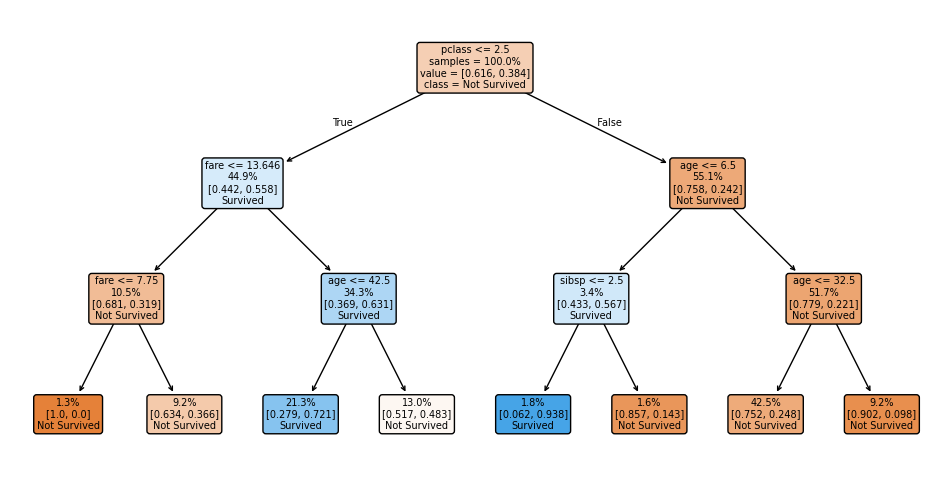

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Select features and target
features = ['pclass', 'age', 'sibsp', 'parch', 'fare']
X = df[features]
y = df['survived']

# Fit CART model
cart = DecisionTreeClassifier(max_depth=3, random_state=42)
cart.fit(X, y)

# Plot the tree
plt.figure(figsize=(12, 6))
plot_tree(
    cart,
    feature_names=features,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    # node_ids=True,
    impurity=False,
    proportion=True,
    rounded=True,
    label='root',
)
plt.show()